# **Analysis of Los Angeles Temperatures Over Time**
***By the #boys -----> Nathaniel Kent & David Aharon***

###**INTRODUCTION**

The overall objective of this project will be to analyze temperature data from the years from 1878 to 2020 in Los Angeles, as these were the first and most recent fully documented years in the database we used. We hope to find trends of climate change using statistical analysis and draw conclusions from the data that we gathered. These conclusisons will help us identify patterns, if temperatures are rising or falling, and predict future temperature trends for the West Coast city of LA.

As climate change has become more and more prevalent in our society, we decided to look into the effects that it has had specifically on Los Angeles. California has been hit especially hard by natural disasters in past decades, which many chalk up to the rising temperatures due to global warming. By looking at the temperature over time we can track trends in extreme temperature fluctuations. We can then use these trends to predict future fluctuations and determine if Los Angeles will follow trends of global temperature rise.

In order to make a conclusion we will use the data found on this webpage: http://www.laalmanac.com/weather/we04a.php

The database found on this page gives us recorded high, low, and average temperatures for every month and year for the last 142 years. We will focus on the annual high, low, and average temperature to draw conclusions.

###**REQUIRED TOOLS**

You will need the following libraries for this project:

- requests

- pandas

- BeautifulSoup

- sklearn

- matplotlib.pyplot

- seaborn

- scipy

- pmdarima

If you do not have these packages downloaded, you can do so from the command line using pip in the format:

```pip install <package_name>```

or use any other installer or method you are comfortable with

We highly recommend referring to the following resources for more information about pandas/installation and python 3.6 in general:

1. https://pandas.pydata.org/pandas-docs/stable/install.html
2. https://docs.python.org/3/

---
## **1. Data Collection**

This is our data collection stage. During this phase, we focus on finding a database that has enough structured information that we are looking for.

In our case, we found a website with a database containing over 100 years of LA temperature, which we found to be a substantial amount of data. 

Once we find a website, the next step is to extract the data. This allows us to view and organize the data anyway we'd like to help us understand and analyze it.

The following is a step-by-step walkthrough of how we extracted the LA temperature data from the website and organized it in a way for us to easily track annual changes in temperature statistics.

Each major step is labeled in the code *(Example: # (1) correlates to step 1)* and is further explained here:


**(1) Retrive desired website**

In this intial step we use the ```requests``` import's ```GET``` method to send an HTTP GET request that retrieves our chosen website (http://www.laalmanac.com/weather/we04a.php) and stores it as a variable named ```res```.

We use ```res```'s ```content``` attribute to convert the GET request into HTML, which we can easily parse data from. 

In [1]:
import requests # used to access the online database

res = requests.get('http://www.laalmanac.com/weather/we04a.php')
html = res.content


**(2) Parse website**

In this step we utilize the BeautifulSoup import to parse the data.

We first prepare the data to be scraped by creating a BeautifulSoup variable which organizes the html by its tags using ```'html.parser'```. 

If you look at our website and inspect the table holding the data, you can clearly see that it is stored within an html ```<table> <\table>``` tag. The second line uses the ```BeautifulSoup.find()``` method to scrape the html for the first occurance of the ```<table>``` tag, which happens to be the table storing the data we need. We store this table in our variable, ```table```.

Now we have successfully extracted the data table we need from the website in html format. 


To learn more about http requests and html structure/parsing, please refer to the following helpful links.



*   https://realpython.com/python-requests/
*   https://developer.mozilla.org/en-US/docs/Learn/HTML/Introduction_to_HTML/Document_and_website_structure
*   https://developer.mozilla.org/en-US/docs/Learn/HTML/Tables


In [2]:
from bs4 import BeautifulSoup # used to pull data from an HTML and parse it

soup = BeautifulSoup(html, 'html.parser')
table = soup.find('table')

**(3) Convert html data into a DataFrame**

Now that we have extracted the table in html we can easily convert it into a pandas dataframe in order easily access and view the data in a structured manner.

We import ```pandas``` so that we can take advantage of the attributes of a dataframe.

Panda's ```read_html()``` method allows us to pass in the table as a string, and turn the html into a list that breaks up the html by ```<table>``` tags and stores each one as a pandas DataFrame.

Our prepared html only contains 1 table, so our list (```df```) has only one element.

To make the DataFrame more visually pleasing we use ```pandas.DataFrame()``` on the first and only DataFrame element in our list, which as you can tell, still needs work to be cleaned up.

In [3]:
import pandas as pd # used to create and manipulate a dataframe

df = pd.read_html(str(table))
dfs = pd.DataFrame(data = df[0])
dfs

,Year,Temp,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual
,Year,Temp,Jan,Feb,Mar,Apr,May,Jul,Jun,Aug,Sep,Oct,Nov,Dec,Annual


**(4) Clean up DataFrame**
 
The first aspect of this part was to restrict the data to just the annual stats, and ignore the monthly temperatures as we agreed that 142 years of annual data was substantial and sufficient. Pandas allows us to select the desired columns and create a new DataFrame with just those columns. The variable ```annual``` is a DataFrame that only contains the columns from the original Data Frame labelled "Year", "Temp", and "Annual." These columns account for the year the data was recorded, whether it was a high, low, or average temperature, and the temperature in Fahrenheit.
 
In our chosen table, every 5 years, the row that labeled the columns was repeated for better readability for a user reading the website. These title rows were automatically printed at the top of our DataFrame, which was undesirable and could be removed.

**IMPORTANT:** Many websites will have its own unique formatting issues when it comes to converting the html text into a DataFrame. There is no one fix that will solve all formatting issues, in our website's case - and after much googling - we found that this line:

```annual.columns = range(annual.shape[1])```

allowed us to get rid of these undesired extra column header rows. You will notice this also renamed the columns to be numeric, which we handle in the next step.
 

In [4]:
annual = pd.DataFrame(data = dfs[['Year','Temp', 'Annual']])
annual.columns = range(annual.shape[1])   # Delete headers
annual

,0,1,2
0,2021,High,---
1,2021,Avg.,---
2,2021,Low,---
3,2020,High,111
4,2020,Avg.,67.8
...,...,...,...
430,1878,Avg.,62.0
431,1878,Low,30
432,1877,High,---
433,1877,Avg.,---


**(5) Handling missing data**
 
Like the previous step, websites vary. They may or may not have missing data, and the way to handle any missing data varies based on your goals.
 
In order to "tidy up" the DataFrame, we first renamed and reordered the columns in a way that we decided was optimal for reading the data. 
 
In our case, the website had incomplete data for the years 1877, 1914 and 2021. Without these years we still have plenty of data to analyze, so we decided to omit them rather than to deal with incomplete data. To do this, we simply created a new DataFrame that excluded all rows that contained years equal to 1877, 1914, or 2021. 

At the end we print the fully prepared DataFrame, and we can now begin our next step: analysis.

In [5]:
annual.columns = annual.columns.astype(str)
annual.rename(columns = {'0': 'Year', '1': 'Temp Type', '2': 'Degrees'}, inplace= True)

# get rid of the years 1877, 1914 and 2021 because they are missing data
annual = annual[(annual['Year'] != 1877) & (annual['Year'] != 1914) & (annual['Year'] != 2021)]

annual

,Year,Temp Type,Degrees
3,2020,High,111
4,2020,Avg.,67.8
5,2020,Low,42
6,2019,High,97
7,2019,Avg.,66.1
...,...,...,...
427,1879,Avg.,61.9
428,1879,Low,30
429,1878,High,103
430,1878,Avg.,62.0


---

## **2. Data Processing**

The next series of code blocks are an example of how data can be plotted on a graph, and can be further interpreted by drawing a line of best fit, aka the linear regression.

Before we start this section, we need to **matplotlib** for plotting, as well as importing **seaborn**, which is a powerful data visualization library based on matplotlib. To learn more about **seaborn** and **matplotlib**, and the various plots it can create to visualize your data, please refer to these guides: https://www.activestate.com/resources/quick-reads/what-is-matplotlib-in-python-how-to-use-it-for-plotting/ and http://seaborn.pydata.org/introduction.html

Now we are ready to start data visualization. We first make a copy of the table that we have created, but only containing the rows in question, in this case only the annual **low** temp rows.

We will use the seaborn function ```regplot()``` to create a scatterplot with the datapoints of temperatures over time, and simultaneously create a linear regression line which we will use to help us draw any conlcusions from our data.

While the linear regression is trending upwards, there are many outliers both far above and below the regression line. We observe that this data does not allow us to draw any major conclusions other than there being a general upwards trend, however this can be attributed to outliers, so we will look for another data set to examine that may have less extreme outliers.

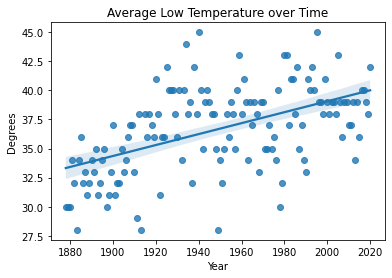

In [6]:
from sklearn import linear_model as lm
import matplotlib.pyplot as plt #for plotting
import seaborn as sns

avg = annual.copy()[annual['Temp Type'] == 'Low']
avg['Degrees'] = avg['Degrees'].astype(float)
sns.regplot(x="Year", y="Degrees", data=avg).set(title = 'Average Low Temperature over Time');

We then move to plotting the annual **high** temperatures in our data set to see if this will offer more meaningful results. Using the same method as before, we isolate the data in question into a seperate table (with only the high temp rows), and plot the points in an effort to try to find a line of best fit that we can draw a conclusion from.

Similarly to above, this graph trends slightly upwards yet has a lot of outliers, making it harder to draw concrete solutions from. These results also do not give us much to work with, so lets move to plotting the **average** annual temperatures for the years we are examining.

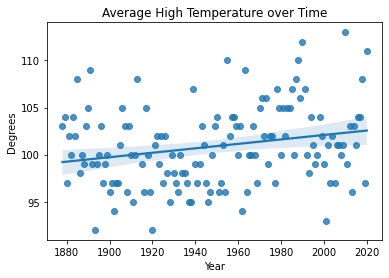

In [7]:
# fit linear regression line to data, must use 2D arrays (reshape)
avg = annual.copy()[annual['Temp Type'] == 'High']
avg['Degrees'] = avg['Degrees'].astype(float)
sns.regplot(x="Year", y="Degrees", data=avg).set(title = 'Average High Temperature over Time');

Finally, lets plot the average annual temperature over the years. Again, we use the same methodology as before, but this time we isolate the **average** temperature rows from each year in order to try to identify a trend.

Ah, now were talking. As you can see below, we can finally see an obvious trend in the data points without too many outliers, unlike the last 2 plots. There is also clearly a steeper positive linear regression slope with this graph compared to either of the first two that we made. This proves that average temperatures in LA have been steadily rising over the last 142 years, following the trend of global warming we constantly hear about more and more lately. Since temperatures in LA are rising over the last 2 centruies, its likely many other US cities and cities around the world have a similar trend.

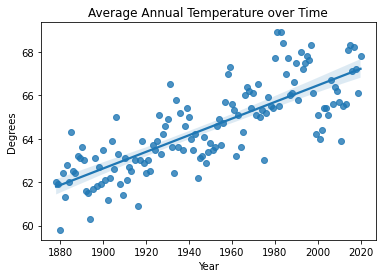

In [8]:
# fit linear regression line to data, must use 2D arrays (reshape)
avg = annual.copy()[annual['Temp Type'] == 'Avg.']
avg['Degrees'] = avg['Degrees'].astype(float)
plot = sns.regplot(x="Year", y="Degrees", data=avg).set(title = 'Average Annual Temperature over Time')


These charts highlight one of the many ways that we can break down and visualize any set of data. In our case using **seaborn**, we were able to isolate seperate subsets of the data to try to find clear trends and draw conclusions.

In our case we went through each of our columns in search of a trend in the data, and by utilizing these graphs we have found one in the average annual temperature over our time period.

Here we will attempt to find the slope of the linear regression that we see in the average annual data. To do this we needed to locate two points that lie on the line of best fit and use the simple rise/run slope formula to compute a slope.

In [9]:
print(avg.loc[[427]])
print(avg.loc[[7]])

slope = float((66.1 - 61.9) / (2019 - 1879))
print("Slope of the regression line = " + "{:.3f}".format(slope))



     Year Temp Type  Degrees
427  1879      Avg.     61.9
   Year Temp Type  Degrees
7  2019      Avg.     66.1
Slope of the regression line = 0.030


Using the points from 1879 and 2019, we see that the slope of the line is ```.03``` degrees/year, meaning the temperature has risen at an average of .03 degrees per year over the course of the last 142 years


---

## **3. Exploratory Analysis and Further Data Visualization:**

Now that we have determined that the average annual temperature over the years gives us the best set of data to make a conclusion off of, we will focus more on it, and analyze it further.

### **Simplifying the Plotted Data**

We realize the above plots had a lot of plotted points, 142 to be exact, and this may be a bit overwhelming to look at. For this part of the project, we wanted to further simplify our data and we are going to only plot the average data across every ~10 years. 

First we will break the data into decades, so we can see which decades saw the most considerable increases in annual average temperature. With this information we can get a better idea of the trajectory of the future average annual temperatures, as well as allowing us to make some conclusions as to what decades experienced the most drastic temperature changes. 

To do this, we looped through each row of our average temperature dataframe (```avg```) we created above and had a temporary array that stored each temperature in a 10 year span. Once we got to the end of the current 10 year set, we took the sum of this temporary array and divided it by the length of the array to calculate the average temperature for that 10 year span. This was then added to another array that stores the average temperature of each decade, which is what we used as our y-axis varaible in our plot.

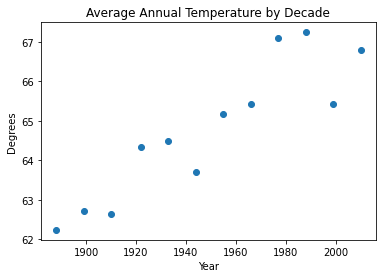

In [10]:
decade_avg = [] # holds average for each 10 year span
decade = [] # every ten year split
count = 0 # counter that resets every ten years

decade_temps = [] # temporary array that holds 10 years of data, resets each 10 years
for i, row in avg.iterrows():
  
  # When we reach the end of a ten year span, calcualate sum of the ten year span, add the data to appropriate lists and reset variable accordingly
  if count == 10:
    decade_avg.append(sum(decade_temps) / len(decade_temps))
    decade.append(avg.at[i, 'Year'])
    count = 0
    decade_temps = []

  # When in the middle of a decade, we add the average for that year into the appropriate list and increment the counter
  else:
    decade_temps.append(avg.at[i, 'Degrees'])
    count = count + 1

# Data comes out most recent to least recent, so we reverse it so that it plots correctly
decade.reverse()
decade_avg.reverse()

# Scatterplot of the data we just gathered
plt.scatter(x=decade, y=decade_avg)
plt.xlabel("Year")
plt.ylabel("Degrees")
plt.title("Average Annual Temperature by Decade")
plt.show()

As you can see, we now are able to successfully plot an average temperature for each individual decade, which allows us to produce a plot with far less points on it, making it have less noise and therefore easier to comprehend. This way we can make more generalized conclusions about the data from decade to decade. 

We can clearly see the upward temperature trend once again, but since it is not a perfectly linear increase, it is hard to see the exact average increase trend over the decades. To help us with, the next section will add a regression line like before, however, we are going to add a curved line to better fit our data and deduce trends from it.

### **Polynomial Regression**

In order to get an even better idea of the trend we are seeing, we will now add a fitted polynomial curve to the graph. This gives us a little more trend direction than the linear regression line would.

In order to do this we implemented a function to calculate the graphs polynomial regression line rather than using the typical linear regression line ax + b function. This allows us to create the "curved" line, rather than a completely straight one. We also utilized some imports from **scipy** and **numpy**.

More can be learned about these libraries here:
- https://numpy.org/doc/stable/user/whatisnumpy.html
- https://www.guru99.com/scipy-tutorial.html 

We used this link that explains how to fit a polynomial curve on a graph. Please refer to the link for any further questions regarding our code:

https://machinelearningmastery.com/curve-fitting-with-python/


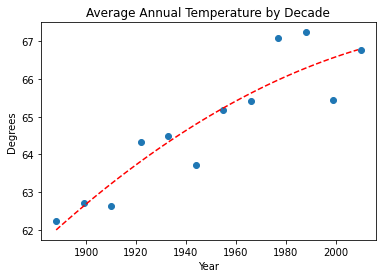

In [11]:
from scipy.optimize import curve_fit
from numpy import arange

# this function calculates the polynomial squares needed for polynomial regression
# this contrasts to the linear slope we had used earlier
def poly(x, a, b, c):
	return a * x + b * x**2 + c

popt, _ = curve_fit(poly, decade, decade_avg)
# summarize the parameter values
a, b, c = popt

plt.scatter(decade, decade_avg)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(decade), max(decade), 1)
# calculate the output for the range
y_line = poly(x_line, a, b, c)

plt.plot(x_line, y_line, '--', color='red')
plt.xlabel("Year")
plt.ylabel("Degrees")
plt.title("Average Annual Temperature by Decade")
plt.show()

The polynomial regression line fits the data better than our previous linear regression line because the polynomial one is not confined to straight line. After looking at our graph with the decade averages and the polynomial regression line, we can make more observations.

The polynomial regression line reaffirms that the average temperature has been rising over the past 142 years, and also allows us to make other conclusions. We see that in more recent decades, there is more fluctuation of the decade averages, as there is only 1 data point near the regression line of the 4 most recent decades, compared to no such outliers for the ~100 years prior (aside from the outlier we see around 1945). 

From this we can deduce that the temperatures over the last 50 years in Los Angeles has become increasingly unpredictable and irregular. There can be several things this change can be attributed to such as population boom, government climate regulations, natural disasters, etc., but these are outside the scope of this project as we are simply recognizing temperature trends.

All in all, this new plot with decade averages and polynomial curved regression line is much more simple to read and makes it easier to interpret LA temperature fluctuations since 1878.

---

## **4. Machine Learning and Prediction Models**

Now that we know that the temperature in LA is increasing steadily over time, we will use Machine Learning to try to predict where temperatures may be in the next 50 years.

To do this prediction, we used the following website to help us prepare, train, and forecast our data:
https://brittarude.github.io/blog/2020/11/22/britta-rude-forecasting-with-python

### **Preparing Our Data**

The first order of business is to prepare our data in order to be able to train it and run the predictive forecast on our data.

To do this, we first create a new DataFrame that only has two columns: `Years` and `Degrees`, which we took from our DataFrame that held the average temperatures of each year. Since the website we scraped our data from starts year 2020 and goes down to year 1878, we had to reverse both of these columns to ensure our data plotted in the correct orientation. 

For our predictive machine learning algorithm, we had to format the year column to allow the year as string objects to be converted to pandas Date Time objects using the pandas `to_datetime()` method. 

In [12]:
pd.options.mode.chained_assignment = None # suppresses unnecessary warnings

ml_data = avg[['Year', 'Degrees']]  # create new dataframe
ml_data['Year'] = ml_data['Year'].copy().to_numpy()[::-1] # reverse year column
ml_data['Degrees'] = ml_data['Degrees'].copy().to_numpy()[::-1] # reverse degree column

ml_data["Year_str"] = ml_data["Year"].astype(str) # make new column that has year as string
ml_data['Year_date'] = ml_data['Year_str'] + "-01-01" # append placeholder format to each year
ml_data["Year_date"] = pd.to_datetime(ml_data["Year_date"]) # convert each year to datetime
ml_data = ml_data.set_index("Year_date")

### **Creating the Predictive Model**

The forecasting model we decided to use for our predictions is called the Autoregressive Integrated Moving Average (ARIMA) model. This model uses time series analysis to generalize the autoregressive moving average model and helps us to predict future points in the data series.

To use the ARIMA model, we had to import the pdarima library. To learn more about ARIMA, please refer to the following link: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

For this section of code, we start by creating our ARIMA model and name it "model" (very original, we know). We use all of the same parameters used in the website I mentioned above that guided us to create our prediction forcast.
The next step was to set the parameters for how many years in the future we wanted to predict, which we decided that predicting up to 2060 was sufficient, giving us 40 years of predictive power.

Now that we had that, we could then actually use the ARIMA.predict() function on our model to actually utilize machine learning and generate a predictive for the average temperature over the next 40 years!

Finally in this section, we turned our predicted array of average values into a Series with the corresponding years in order to be able to successfully plot our predictions, as we do in the next section.



In [13]:
# below line suppresses unnecessary warnings
import pmdarima as pm # library for Autoregressive integrated moving average machine learning model

model = pm.auto_arima(ml_data[['Degrees']],     # creating the ARIMA model
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=10,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

n_periods = 40 # this will allow our model to predict the next 40 years from 2020
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True) # predict the model for the next 40 years

index_of_fc = pd.Series(pd.date_range("2020-01-01", periods=n_periods, freq="Y")) # makes x-axis values for the years 2020 to 2060

fitted_series = pd.Series(fitted, index=index_of_fc) # make into series for plotting purpose

### **Plotting the Predictions**

The final step is to simply plot our known data and our predicted forecast together on a simple line plot.

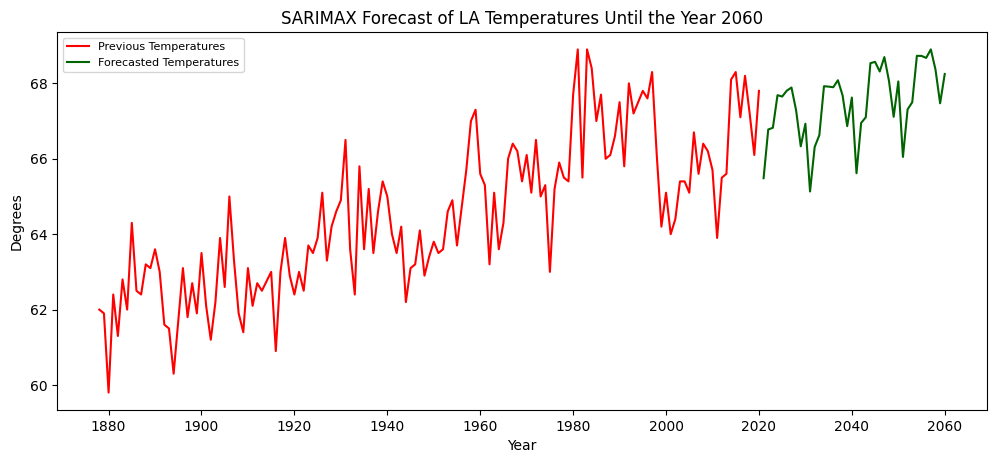

In [14]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(ml_data.Degrees, color='red', label='Previous Temperatures') # plot the known data in red
plt.plot(fitted_series, color='darkgreen', label='Forecasted Temperatures') # plot the forecasted data in dark green
plt.legend(loc='upper left', fontsize=8)

plt.title("SARIMAX Forecast of LA Temperatures Until the Year 2060")
plt.ylabel("Degrees")
plt.xlabel("Year")
plt.show()

We output the existing data along with the predictions that we made color coded for clarity. As you can see, our machine learning functionality predicts a steady uptick in average annual temperature, with some fluctuations throughout the years. The learned part of the graph - represented as the dark green segment - takes a similar shape to the past several decades of the existing data, highlighting that our algorithm takes into account not only the general trend of the graph, but the characteristics and habits of the data in order to compute what the future average annual temperatures may be.

---

### **The Past, Present, and Future of LA Temperatures**

Now we will use the predictive model to determine what the average annual temperatures may become in future decades. To do this, we will pull the data points for each decade ending over the next 40 year forecast.

In [15]:
print("2030 annual average: " + "{:.3f}".format(fitted_series[9]))
print("2040 annual average: " + "{:.3f}".format(fitted_series[19]))
print("2050 annual average: " + "{:.3f}".format(fitted_series[29]))
print("2060 annual average: " + "{:.3f}".format(fitted_series[39]))

2030 annual average: 66.929
2040 annual average: 67.622
2050 annual average: 68.050
2060 annual average: 68.248


Now that we have some future predictions, we can make some conclusions about our data.
 
In 1878, where our data begins, the average annual temperature was 62.0 degrees. In 2020, where our data ends, it was 67.8 degrees.
 
We recognize that the average annual temperature is rising, and we see that our conclusion is backed up by the predictive analysis from our Machine Learning algorithm. We predict that the average annual LA temperature will continue to slowly rise to be above 68 degrees by 2060, nearly 6 degrees higher than it was just under 200 years ago...yikes!